# Step 3 - Climate Analysis and Exploration
You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

Precipitation Analysis Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Plot the results using the DataFrame plot method.

In [94]:
# All dependency
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests as req
import seaborn as sns
from datetime import datetime, date, timedelta
from  matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Date
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import extract
from sqlalchemy import func, desc
import pymysql
pymysql.install_as_MySQLdb()
 

In [120]:
#Use SQLAlchemy create_engine to connect to your already created/saved data,  sqlite database.
#engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///dropna_hawaii.sqlite")

In [121]:
# Declare a Base using `automap_base()`\n",
Base = automap_base()

In [122]:
# Use the Base class to reflect the database tables\n",
Base.prepare(engine, reflect=True)
 

In [123]:
# Print all of the classes mapped to the Base\n",
Base.classes.keys()

['measurements', 'stations']

In [124]:
# Assign the Measurement class to a variable called measurement
measurement = Base.classes.measurements

In [125]:
Base.classes.measurements

sqlalchemy.ext.automap.measurements

In [126]:
# Assign the Measurement class to a variable called station
station = Base.classes.stations

In [127]:
# Assign the station class to a variable called station
Base.classes.stations

sqlalchemy.ext.automap.stations

In [128]:
# Create a session
from sqlalchemy.orm import Session
session = Session(bind=engine)

## Precipitation Analysis Design a query to retrieve the last 12 months of precipitation data.

In [129]:
# Assigned the Measurement class to a variable called measurement in previous sections.

# Here saving my query to a list
mylist = session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-23', '2017-08-23')).all() 
 

In [130]:
mylist
len(mylist)

2021

In [131]:
engine = engine.connect()
engine

In [132]:
# Converting my list to a dataframe.
df = pd.DataFrame.from_records(mylist)
df.head()

,0,1
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [133]:
# Renaming the columns to Date and Precipitation
prcp_analysis_df = df.rename(columns={0: "Date", 1: "precipitation"})
prcp_analysis_df.head()

,Date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [134]:
#  set the index to the date column.
prcp_analysis_df.set_index(['Date'], inplace=True)
prcp_analysis_df.head()

,precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [135]:
type(prcp_analysis_df.precipitation[0])

numpy.float64

In [136]:
plt.style.use('ggplot')
fig = plt.figure() 
 

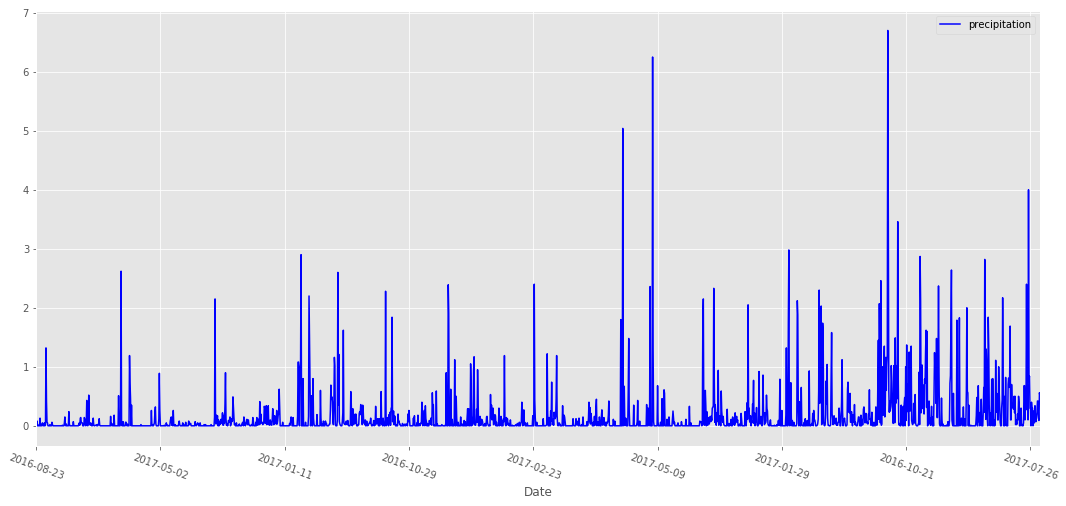

In [137]:
#Plot the results using the DataFrame plot method.

prcp_analysis_df.plot(figsize = (18,8), color='blue', rot = 340 )
plt.show()
 

# Station Analysis
Design a query to calculate the total number of stations.

Design a query to find the most active stations.

List the stations and observation counts in descending order
Which station has the highest number of observations?
Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [138]:
tot_stations = session.query(station.station).filter(station.station == 'USC00519397').count()
tot_stations
 

1

## Design a query to calculate the total number of stations.

In [139]:
 

tol_num_stations = session.query(measurement).group_by(measurement.station).count()
tol_num_stations
 

9

In [140]:
# Design a query to find the most active stations.
from sqlalchemy import create_engine, func, inspect
inspector = inspect(engine)
inspector.get_table_names()


['measurements', 'stations']

## Design a query to find the most active stations. 

In [141]:
Active_stations = session.query(measurement.station, station.name, measurement.date, func.count(measurement.tobs)).\
                          join(station, station.station == measurement.station).\
                          group_by(measurement.station).\
                          order_by(func.count(measurement.tobs).desc()).all()

            
#List the stations and observation counts in descending order Which station has the highest number of observations?
Active_stations


[('USC00519281', 'WAIHEE 837.5, HI US', '2017-08-18', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', '2017-07-31', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2017-08-23', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '2017-08-23', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '2017-08-23', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '2017-08-23', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', '2015-10-30', 1932),
 ('USC00517948', 'PEARL CITY, HI US', '2017-07-28', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', '2015-10-20', 342)]

In [142]:
type(Active_stations)

list

In [143]:
Active_stations[0][0]

'USC00519281'

In [144]:
#Filter by the station with the highest number of observations.
Active_stations[0][0:2]

('USC00519281', 'WAIHEE 837.5, HI US')

In [145]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
station_tobs = session.query(measurement.station, station.station.name, measurement.date, measurement.tobs).\
               filter(measurement.station == (Active_stations[0][0])).\
               filter(measurement.date.between('2016-08-23', '2017-08-23')).all()
            
        
len(station_tobs)


352

In [146]:
type(station_tobs)

list

In [147]:
# Converting my station_temp_tobs to a dataframe.
tobs_df = pd.DataFrame.from_records(station_tobs)
tobs_df.head()

,0,1,2,3
0,USC00519281,USC00519281,2016-08-23,77
1,USC00519281,USC00519281,2016-08-24,77
2,USC00519281,USC00519281,2016-08-25,80
3,USC00519281,USC00519281,2016-08-26,80
4,USC00519281,USC00519281,2016-08-27,75


In [148]:
# Renaming the columns to station, name, tobs
station_analysis_df = tobs_df.rename(columns={0: "station", 1: "name", 2: "date", 3: "tobs"})
station_analysis_df.head()

,station,name,date,tobs
0,USC00519281,USC00519281,2016-08-23,77
1,USC00519281,USC00519281,2016-08-24,77
2,USC00519281,USC00519281,2016-08-25,80
3,USC00519281,USC00519281,2016-08-26,80
4,USC00519281,USC00519281,2016-08-27,75


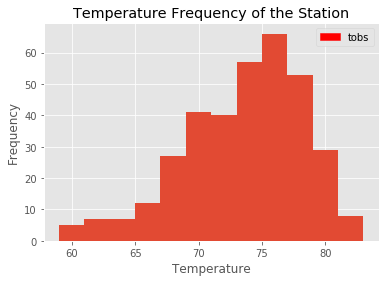

In [149]:
#Plot the results as a histogram with bins=12.
plt.style.use('ggplot')
fig = plt.figure() 
plt.figsize = (18,8)

x = station_analysis_df['tobs'] 

# the histogram of the data
plt.hist(x, bins=12)


#create legend
red_patch = mpatches.Patch(color='red', label='tobs')
plt.legend(handles=[red_patch])

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Frequency of the Station')
plt.grid(True)
plt.show()

 
plt.show()


# Temperature Analysis
Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.

Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [150]:
#rather than calling for your temps every time with sqlalchemy, is to call them all once and store them in a DataFrame 

#Write a function called calc_temps that will accept a start date and end date 
#in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

#from datetime import datetime

#temp_list = []

#def calc_temps(start, end):
#    date_format = "%Y-%m-%d"
 
#    temp_max = session.query(func.max(measurement.tobs)).\
#                           filter(measurement.date.between(start, end)).one()
            
#    temp_min = session.query(func.min(measurement.tobs)).\
#                           filter(measurement.date.between(start, end)).one()
            
#    temp_avg = session.query(func.avg(measurement.tobs)).\
#                           filter(measurement.date.between(start, end)).one()
    
#    temps = (temp_max, temp_min, temp_avg)
#    for i in temps:
#        temp_list.append(i)
     
#    return(temp_max, temp_min, temp_avg)




# temp_max, temp_min, temp_mean = calc_temps("2017-01-01", "2018-01-01")    
 

In [151]:
# running a sqlalchemy query to get the date and tobs from  the measurement table.
tobs_date = session.query(measurement.date, measurement.tobs).all()
tobs_date                   

[('2010-01-01', 65),
 ('2010-01-02', 63),
 ('2010-01-03', 74),
 ('2010-01-04', 76),
 ('2010-01-07', 70),
 ('2010-01-08', 64),
 ('2010-01-09', 68),
 ('2010-01-10', 73),
 ('2010-01-11', 64),
 ('2010-01-12', 61),
 ('2010-01-14', 66),
 ('2010-01-15', 65),
 ('2010-01-16', 68),
 ('2010-01-17', 64),
 ('2010-01-18', 72),
 ('2010-01-19', 66),
 ('2010-01-20', 66),
 ('2010-01-21', 69),
 ('2010-01-22', 67),
 ('2010-01-23', 67),
 ('2010-01-24', 71),
 ('2010-01-25', 67),
 ('2010-01-26', 76),
 ('2010-01-27', 68),
 ('2010-01-28', 72),
 ('2010-01-31', 67),
 ('2010-02-01', 66),
 ('2010-02-04', 69),
 ('2010-02-05', 67),
 ('2010-02-06', 67),
 ('2010-02-07', 64),
 ('2010-02-08', 69),
 ('2010-02-09', 73),
 ('2010-02-11', 73),
 ('2010-02-12', 69),
 ('2010-02-13', 69),
 ('2010-02-14', 69),
 ('2010-02-15', 71),
 ('2010-02-16', 61),
 ('2010-02-17', 69),
 ('2010-02-20', 64),
 ('2010-02-21', 65),
 ('2010-02-22', 67),
 ('2010-02-23', 68),
 ('2010-02-24', 65),
 ('2010-02-25', 76),
 ('2010-02-26', 75),
 ('2010-02-28

In [152]:
# Converting my tobs_date list to a dataframe.
tobs_date_df = pd.DataFrame.from_records(tobs_date)
tobs_date_df.head()

,0,1
0,2010-01-01,65
1,2010-01-02,63
2,2010-01-03,74
3,2010-01-04,76
4,2010-01-07,70


In [153]:
# Renaming the columns to date, tobs
tobs_date_df = tobs_date_df.rename(columns={0: "date", 1: "tobs" })
tobs_date_df.head()

,date,tobs
0,2010-01-01,65
1,2010-01-02,63
2,2010-01-03,74
3,2010-01-04,76
4,2010-01-07,70


In [154]:
#Here I am making a function which asks for 2 dates and returns a plot of the temperatures
# Also saving my data in a dataframe and calling the sqlalchemy only once to get all the data.

#Somehow the dataframe calculation does not show exactly the "yerr" on this graph. I tried very hard. But could not.
 

def calc_temps(date1, date2):
    mask = (tobs_date_df['date'] >= date1) & (tobs_date_df['date'] <= date2)
    
    fig, ax = plt.subplots(figsize = (5,8))
    ax.bar(x= [1], width = 1, height = tobs_date_df[mask]['tobs'].mean(), yerr = (tobs_date_df[mask]['tobs'].max()-tobs_date_df[mask]['tobs'].min()))       
    
    ax.set_xticks([0,1,2])
    ax.tick_params(axis='x',which='both', labelbottom='off')
    
    ax.set_yticks([0,20,40,60,80,100])
    plt.title('Trip Average Temp', fontsize = 14)
    ax.set_ylabel('Temp (F)', fontsize = 12)
    plt.show()
    
    
    print('The trip average temperature is: %s degrees' % tobs_date_df[mask]['tobs'].mean())
    print('The trip max temperature is: %s degrees' % tobs_date_df[mask]['tobs'].max())
    print('The trip minimum temperature is: %s degrees' % tobs_date_df[mask]['tobs'].min())
 

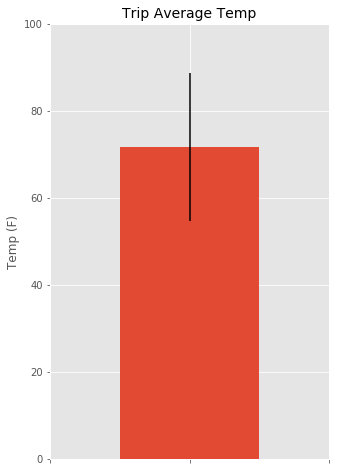

The trip average temperature is: 71.64406779661017 degrees
The trip max temperature is: 82 degrees
The trip minimum temperature is: 65 degrees


In [155]:
calc_temps("2017-03-10", "2017-03-20") 

# Optional Recommended Analysis
The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

1) Calcualte the rainfall per weather station using the previous year's matching dates.
2) Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.
Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
Use Pandas to plot an area plot (stacked=False) for the daily normals.


In [156]:
#Calcualte the rainfall per weather station using the previous year's matching dates.
number_station = session.query(measurement.station, func.sum(measurement.prcp).label('rainfall')).\
                 filter(measurement.date.between('2016-08-23', '2017-08-23')).\
                 group_by(measurement.station).\
                 order_by(desc('rainfall')).all()
    
    
number_station 

[('USC00516128', 147.81000000000006),
 ('USC00519281', 70.03000000000003),
 ('USC00513117', 48.510000000000026),
 ('USC00519523', 38.01),
 ('USC00514830', 33.239999999999995),
 ('USC00519397', 16.089999999999986),
 ('USC00517948', 4.59)]

In [157]:
type(measurement.prcp)

sqlalchemy.orm.attributes.InstrumentedAttribute

In [158]:
#Create a function called `daily_normals` that will calculate the daily normals for a specific date. 
#This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

def daily_normals(chosen_date):
    
    record = str(chosen_date).split('-')
    chosen_month = record[0]
    chosen_day = record[1]
    
    results = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
               filter((extract('month', measurement.date)==chosen_month) and (extract('day', measurement.date)==chosen_day)).\
               group_by(measurement.station).all()
        
    date_daily_normal_df = pd.DataFrame(results[:], columns=['Min_Temp', 'Avg_Temp', 'Max_Temp'])
         
    T_min = date_daily_normal_df["Min_Temp"].mean()
    T_avg = date_daily_normal_df["Avg_Temp"].mean()
    T_max = date_daily_normal_df["Max_Temp"].mean()
    
    
    return(T_min, T_avg, T_max)


 

In [159]:
#Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the 
#normals for each date string and append the results to a list.
#Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

chosen_date_tmin_list = []
chosen_date_tavg_list = []
chosen_date_tmax_list = []

chosen_date_list = ['1-2','2-17','3-23', '7-04', '10-14', '5-24', '9-10']

for chosen_date in chosen_date_list:
    
    min_temp, avg_temp, max_temp = daily_normals(chosen_date)
    
    chosen_date_tmin_list.append(min_temp)
    chosen_date_tavg_list.append(avg_temp)
    chosen_date_tmax_list.append(max_temp)
next
info_data = {"Date": chosen_date_list, "T_Min": chosen_date_tmin_list, "T_Avg": chosen_date_tavg_list, "T_Max": chosen_date_tmax_list}
info_df = pd.DataFrame(info_data)
info_df.set_index('Date', inplace=True, )
info_df

,T_Avg,T_Max,T_Min
Date,,,
1-2,68.881903,78.333333,57.333333
2-17,69.579099,79.111111,59.222222
3-23,69.946996,78.888889,60.000000
7-04,75.909180,82.666667,69.222222
10-14,75.347900,82.777778,67.777778
5-24,73.753177,81.111111,66.222222
9-10,76.171867,84.000000,69.222222


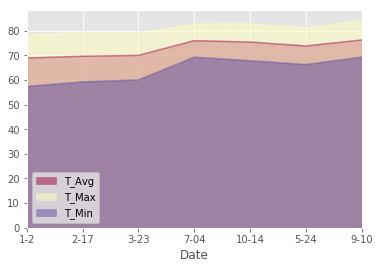

In [160]:
#Use Pandas to plot an area plot (`stacked=False`) for the daily normals.
info_df.plot(kind='area', stacked=False, alpha=0.5, colormap='Spectral')
plt.show()

In [161]:
#Create a function called `daily_normals` that will calculate the daily normals for a specific date. with sqlalchhemy session

special_date_list = ['1-2','2-17','3-23', '7-04', '10-14', '5-24', '9-10']

stmt = session.query(func.min(measurement.tobs).label("Min Temp"),
                     func.max(measurement.tobs).label("Max Temp"),
                     func.avg(measurement.tobs).label("Avg Temp")).\
                     filter(func.strftime("%m-%d", measurement.date)=='12-20').\
                     group_by(measurement.date).all()
stmt

[(68, 73, 71.16666666666667),
 (70, 74, 71.57142857142857),
 (65, 71, 69.66666666666667),
 (69, 79, 72.75),
 (72, 81, 76.5),
 (72, 75, 73.6),
 (73, 77, 75.5)]

In [162]:
special_date_list = ['1-2','2-17','3-23', '7-04', '10-14', '5-24', '9-10']

stmt = session.query(func.min(measurement.tobs).label("Min-Temp"),
                     func.max(measurement.tobs).label("Max-Temp"),
                     func.avg(measurement.tobs).label("Avg-Temp")).\
                     filter(func.strftime("%m-%d", measurement.date)=='12-20').\
                     group_by(measurement.date).subquery()
stmt

<sqlalchemy.sql.selectable.Alias at 0x1a1f446c50; %(112193727568 anon)s>